In [2]:
from keras.datasets import cifar10
import numpy as np
from matplotlib import pyplot
from scipy.misc import toimage

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 47s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until


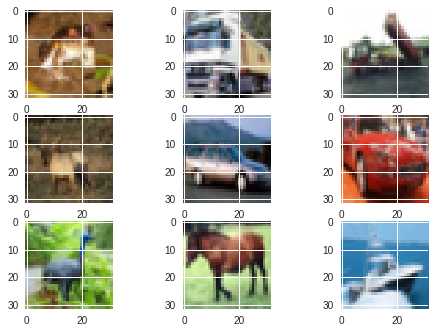

In [0]:
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(x_train[i]))
# show the plot
pyplot.show()

In [0]:
X_train = x_train.reshape(50000, 32 * 32 * 3)
X_test = x_test.reshape(10000, 32 * 32 * 3)

The pixel values for the red, green, blue channel are in the range of 0 to 255. Hence we need to normalize the data in the range 0 to 1 for improved performance. This can be done by dividing each value by the maximum range of the observation. To perform the division we need to first convert the integers into float in the data.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0


Output variable are vectors of integers from range 0 to 1 for each catagory. For properly modeling our classification task we can one hot encode them into a binary matrix.

In [0]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD

Now lets build a multilayer perceptron. We will use 3 dense layers. The first layer has 1024 neurons

**Model 1**

In [17]:

    # MLP
    from keras.layers import LeakyReLU
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))    #32*32*3(RGB)
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # Compile model
    epochs = 50
    lrate = 0.01
    
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_11 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
__________

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.0616 - acc: 0.6199 - val_loss: 1.2524 - val_acc: 0.5517
Epoch 2/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.0580 - acc: 0.6201 - val_loss: 1.2521 - val_acc: 0.5572
Epoch 3/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.0550 - acc: 0.6223 - val_loss: 1.2424 - val_acc: 0.5611
Epoch 4/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.0484 - acc: 0.6236 - val_loss: 1.2327 - val_acc: 0.5597
Epoch 5/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.0392 - acc: 0.6264 - val_loss: 1.2306 - val_acc: 0.5610
Epoch 6/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.0362 - acc: 0.6278 - val_loss: 1.2363 - val_acc: 0.5611
Epoch 7/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.0279 - acc: 0.6296 - val_loss: 1.

In [0]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc*100)

Test loss: 1.2382260320663452
Test acc: 55.84


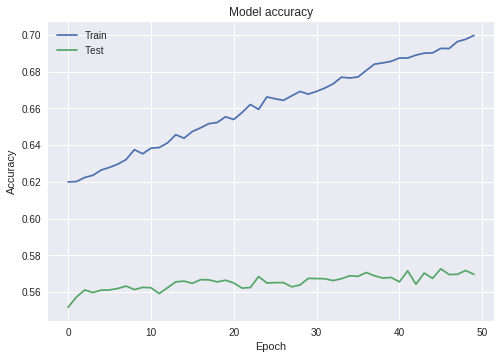

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


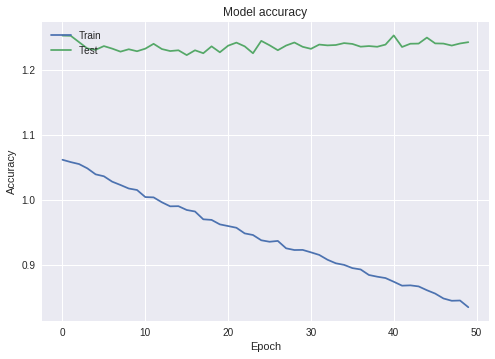

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Model 2**


Let take the same architecture and train if for more epochs. We can expect the accuracy to improve since we are using more epochs.

In [0]:
    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # Compile model
    epochs = 100
    lrate = 0.01
    
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_9 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
__________

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 237us/step - loss: 1.9515 - acc: 0.2828 - val_loss: 1.7715 - val_acc: 0.3571
Epoch 2/100
50000/50000 [==============================] - 11s 226us/step - loss: 1.7909 - acc: 0.3511 - val_loss: 1.6865 - val_acc: 0.3891
Epoch 3/100
50000/50000 [==============================] - 11s 226us/step - loss: 1.7161 - acc: 0.3799 - val_loss: 1.6337 - val_acc: 0.4257
Epoch 4/100
50000/50000 [==============================] - 11s 226us/step - loss: 1.6523 - acc: 0.4059 - val_loss: 1.5796 - val_acc: 0.4293
Epoch 5/100
50000/50000 [==============================] - 11s 225us/step - loss: 1.6091 - acc: 0.4208 - val_loss: 1.5440 - val_acc: 0.4518
Epoch 6/100
50000/50000 [==============================] - 11s 224us/step - loss: 1.5692 - acc: 0.4379 - val_loss: 1.5121 - val_acc: 0.4580
Epoch 7/100
50000/50000 [==============================] - 11s 223us/step - loss: 1.5421 - acc: 0.4486 - val_l

In [0]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc*100)

Test loss: 1.2950179761886598
Test acc: 56.8


In [0]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', loss)
print('Train acc:', acc*100)

Train loss: 0.5139294940185547
Train acc: 83.614


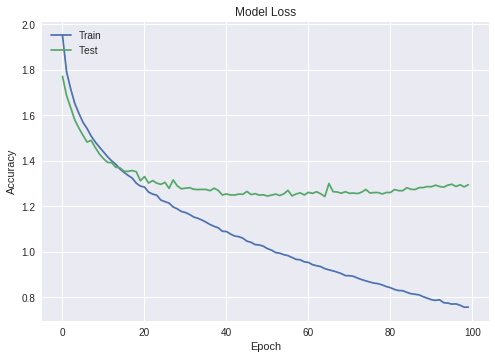

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Validation loss 


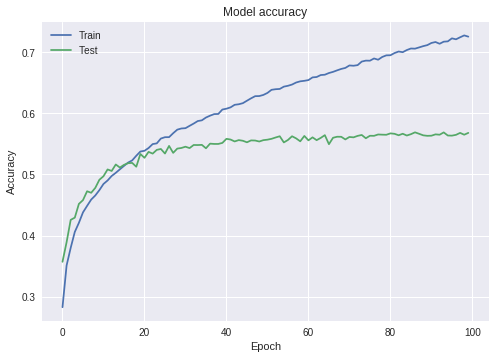

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


We can see from the numbers and the graphs that there is a significant difference in the performance of the network on the training and testing data. Our network is overfitting. 


So increasing the epochs did not yeild a better preformance in terms of accuracy or loss. It actually caused overfitting to solve this we can now try to increase the complexity of the network by adding more layers.


**MODEL 3**

In [0]:
    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024))           #new     
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))            #new
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))            #new
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # Compile model
    epochs = 150
    lrate = 0.01
    
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_13 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_14 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
__________

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/150
50000/50000 [==============================] - 15s 296us/step - loss: 2.0010 - acc: 0.2556 - val_loss: 1.8358 - val_acc: 0.3204
Epoch 2/150
50000/50000 [==============================] - 14s 276us/step - loss: 1.8521 - acc: 0.3212 - val_loss: 1.7266 - val_acc: 0.3668
Epoch 3/150
50000/50000 [==============================] - 14s 277us/step - loss: 1.7731 - acc: 0.3557 - val_loss: 1.6546 - val_acc: 0.4084
Epoch 4/150
50000/50000 [==============================] - 14s 278us/step - loss: 1.7134 - acc: 0.3808 - val_loss: 1.6152 - val_acc: 0.4183
Epoch 5/150
50000/50000 [==============================] - 14s 282us/step - loss: 1.6622 - acc: 0.4008 - val_loss: 1.6000 - val_acc: 0.4259
Epoch 6/150
50000/50000 [==============================] - 14s 275us/step - loss: 1.6280 - acc: 0.4162 - val_loss: 1.5770 - val_acc: 0.4307
Epoch 7/150
50000/50000 [==============================] - 14s 275us/step - loss: 1.5910 - acc: 0.4286 - val_l

In [0]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc*100)

Test loss: 1.5659649478912354
Test acc: 57.16


We can see there is significant difference between validation accuracy and training accuracy indicating there is overfitting.

**Model 4**

Adding 2 dense layers with 256 neurons, reducing the learning rate to 0.001 and reducing the batch size to 16.

In [0]:
    # MLP
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024))           #new     
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))            #new
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))            #new
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # Compile model
    epochs = 150
    lrate = 0.001
    
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_20 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_21 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
__________

In [46]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=16)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 30s 605us/step - loss: 2.1313 - acc: 0.1813 - val_loss: 1.9285 - val_acc: 0.2850
Epoch 2/200
50000/50000 [==============================] - 29s 586us/step - loss: 1.9102 - acc: 0.2867 - val_loss: 1.7760 - val_acc: 0.3492
Epoch 3/200
50000/50000 [==============================] - 29s 590us/step - loss: 1.8176 - acc: 0.3316 - val_loss: 1.6947 - val_acc: 0.3907
Epoch 4/200
50000/50000 [==============================] - 29s 587us/step - loss: 1.7525 - acc: 0.3571 - val_loss: 1.6367 - val_acc: 0.4042
Epoch 5/200
50000/50000 [==============================] - 29s 585us/step - loss: 1.7055 - acc: 0.3794 - val_loss: 1.6022 - val_acc: 0.4205
Epoch 6/200
50000/50000 [==============================] - 29s 588us/step - loss: 1.6685 - acc: 0.3959 - val_loss: 1.5615 - val_acc: 0.4432
Epoch 7/200
50000/50000 [==============================] - 29s 586us/step - loss: 1.6314 - acc: 0.4103 - val_l

In [0]:
The model did not work and produced no usefull results. 

**MODEL5**

Trying with less layers and less neurons per layer. 


In [49]:
    model = Sequential()
    model.add(Dense(16, input_shape=(3072, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16))           #new     
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # Compile model
    epochs = 150
    lrate = 0.001
    
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 16)                49168     
_________________________________________________________________
activation_29 (Activation)   (None, 16)                0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_30 (Activation)   (None, 16)                0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
__________

In [50]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 306us/step - loss: 2.2160 - acc: 0.1533 - val_loss: 2.0664 - val_acc: 0.2421
Epoch 2/100
50000/50000 [==============================] - 15s 298us/step - loss: 2.0824 - acc: 0.2083 - val_loss: 1.9728 - val_acc: 0.2632
Epoch 3/100
50000/50000 [==============================] - 15s 308us/step - loss: 2.0332 - acc: 0.2319 - val_loss: 1.9666 - val_acc: 0.2761
Epoch 4/100
50000/50000 [==============================] - 15s 303us/step - loss: 2.0091 - acc: 0.2373 - val_loss: 1.9266 - val_acc: 0.2945
Epoch 5/100
50000/50000 [==============================] - 15s 297us/step - loss: 1.9904 - acc: 0.2476 - val_loss: 1.8992 - val_acc: 0.3041
Epoch 6/100
50000/50000 [==============================] - 15s 297us/step - loss: 1.9749 - acc: 0.2533 - val_loss: 1.8903 - val_acc: 0.2991
Epoch 7/100
50000/50000 [==============================] - 15s 298us/step - loss: 1.9631 - acc: 0.2573 - val_l

The validation accuracy is 40% and training accuray is 35%. 

**Model 6** 
Model 3 has so far given the best performance. Stacking layers and increasing the epochs isn't helping the model anymore. Now lets try with different activation fuctions to see how it works. 


In [51]:
    # MLP
    from keras.layers import LeakyReLU
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(1024))           #new     
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(512))            #new
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(512))            #new
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # Compile model
    epochs = 150
    lrate = 0.01
    
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               524800    
__________

In [52]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 320us/step - loss: 1.9757 - acc: 0.2681 - val_loss: 1.8054 - val_acc: 0.3414
Epoch 2/100
50000/50000 [==============================] - 15s 296us/step - loss: 1.8078 - acc: 0.3442 - val_loss: 1.6994 - val_acc: 0.3782
Epoch 3/100
50000/50000 [==============================] - 15s 296us/step - loss: 1.7199 - acc: 0.3805 - val_loss: 1.6473 - val_acc: 0.4095
Epoch 4/100
50000/50000 [==============================] - 15s 297us/step - loss: 1.6574 - acc: 0.4056 - val_loss: 1.5910 - val_acc: 0.4413
Epoch 5/100
50000/50000 [==============================] - 15s 294us/step - loss: 1.6037 - acc: 0.4243 - val_loss: 1.5267 - val_acc: 0.4563
Epoch 6/100
50000/50000 [==============================] - 15s 300us/step - loss: 1.5650 - acc: 0.4393 - val_loss: 1.4968 - val_acc: 0.4620
Epoch 7/100
50000/50000 [==============================] - 15s 293us/step - loss: 1.5299 - acc: 0.4491 - val_l

In [53]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc*100)

Test loss: 1.4856936555862428
Test acc: 58.26


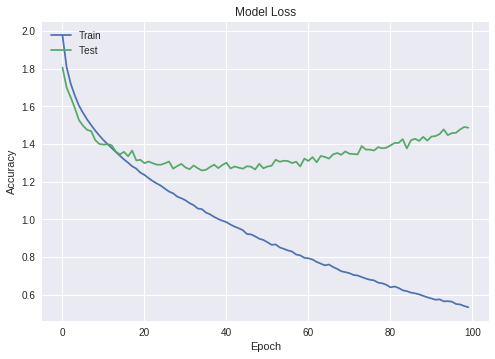

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()





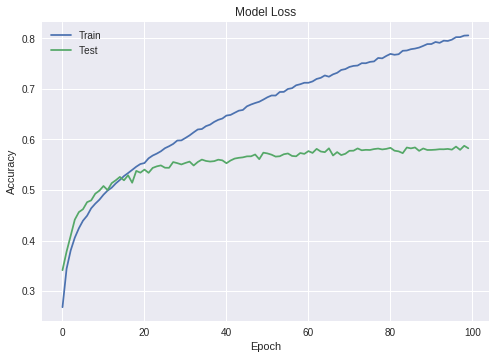

In [55]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()





We can see that after approx 60 epochs the accuracy and the loss for the testing data plateaus.
This model has provided the best accuracy and loss so far for the testing data.


**Model 7**

To handle the overfitting lets try to increase the drop out rate. 

In [25]:
    # MLP
    from keras.layers import LeakyReLU
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(1024))           #new     
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(512))            #new
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(512))            #new
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    #model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # Compile model
    epochs = 70
    lrate = 0.01
    
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
__________

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 14s 282us/step - loss: 2.1238 - acc: 0.1913 - val_loss: 1.9684 - val_acc: 0.2665
Epoch 2/70
50000/50000 [==============================] - 14s 271us/step - loss: 1.9716 - acc: 0.2670 - val_loss: 1.8709 - val_acc: 0.3150
Epoch 3/70
50000/50000 [==============================] - 14s 275us/step - loss: 1.9020 - acc: 0.2985 - val_loss: 1.8354 - val_acc: 0.3405
Epoch 4/70
50000/50000 [==============================] - 14s 278us/step - loss: 1.8545 - acc: 0.3218 - val_loss: 1.7865 - val_acc: 0.3522
Epoch 5/70
50000/50000 [==============================] - 13s 268us/step - loss: 1.8136 - acc: 0.3409 - val_loss: 1.7132 - val_acc: 0.3879
Epoch 6/70
50000/50000 [==============================] - 14s 271us/step - loss: 1.7826 - acc: 0.3535 - val_loss: 1.7147 - val_acc: 0.3796
Epoch 7/70
50000/50000 [==============================] - 13s 270us/step - loss: 1.7541 - acc: 0.3634 - val_loss: 1.

In [30]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc*100)

Test loss: 1.344154695701599
Test acc: 52.470000000000006


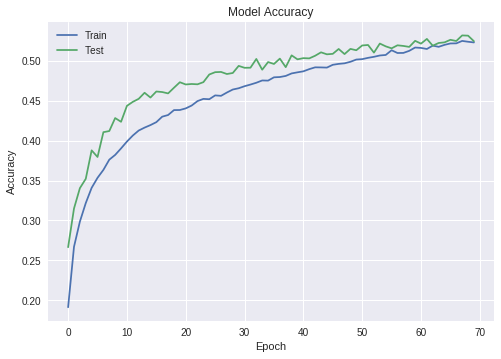

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

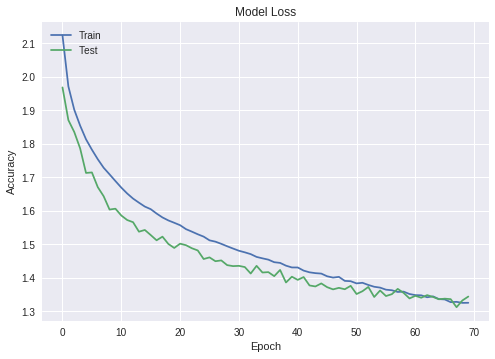

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Model 8**  lets try to reduce the learning rate even more and increase the drop out for the bottom layers.  

In [31]:
    # MLP
    from keras.layers import LeakyReLU
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(1024))           #new     
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(512))            #new
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(512))            #new
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # Compile model
    epochs = 70
    lrate = 0.001
    
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               524800    
__________

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 288us/step - loss: 2.2751 - acc: 0.1276 - val_loss: 2.1355 - val_acc: 0.1915
Epoch 2/100
50000/50000 [==============================] - 14s 272us/step - loss: 2.1099 - acc: 0.1864 - val_loss: 2.0334 - val_acc: 0.2208
Epoch 3/100
50000/50000 [==============================] - 14s 273us/step - loss: 2.0371 - acc: 0.2221 - val_loss: 1.9766 - val_acc: 0.2297
Epoch 4/100
50000/50000 [==============================] - 14s 271us/step - loss: 1.9818 - acc: 0.2455 - val_loss: 1.9211 - val_acc: 0.2643
Epoch 5/100
50000/50000 [==============================] - 14s 271us/step - loss: 1.9420 - acc: 0.2634 - val_loss: 1.9205 - val_acc: 0.2722
Epoch 6/100
50000/50000 [==============================] - 13s 269us/step - loss: 1.9099 - acc: 0.2814 - val_loss: 1.8585 - val_acc: 0.3023
Epoch 7/100
50000/50000 [==============================] - 15s 294us/step - loss: 1.8787 - acc: 0.2967 - val_l

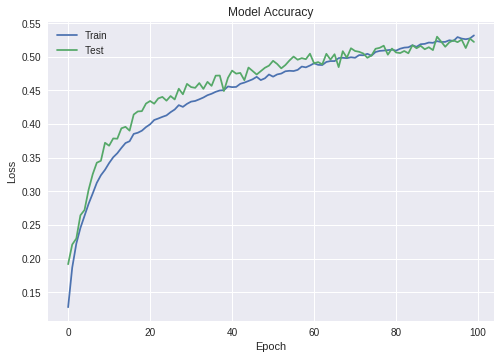

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

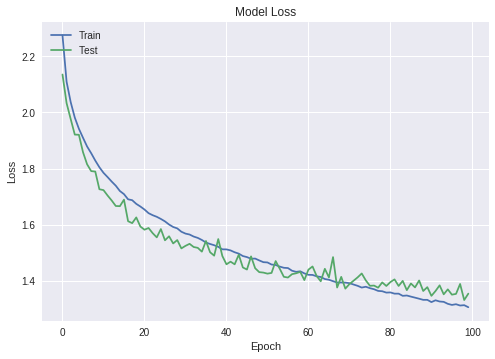

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Model 9**

Lets try with activation function tan-h 


In [9]:
    # MLP
    from keras.layers import Activation
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072, )))
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(1024))           #new     
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(512))            #new
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(512))            #new
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # Compile model
    epochs = 70
    lrate = 0.001
    
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
activation_4 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
activation_5 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
__________

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 14s 275us/step - loss: 2.2432 - acc: 0.1674 - val_loss: 2.0545 - val_acc: 0.2770
Epoch 2/70
50000/50000 [==============================] - 14s 275us/step - loss: 2.0562 - acc: 0.2349 - val_loss: 2.0420 - val_acc: 0.3111
Epoch 3/70
50000/50000 [==============================] - 14s 273us/step - loss: 1.9915 - acc: 0.2645 - val_loss: 2.0076 - val_acc: 0.3174
Epoch 4/70
50000/50000 [==============================] - 14s 273us/step - loss: 1.9534 - acc: 0.2810 - val_loss: 1.9878 - val_acc: 0.3307
Epoch 5/70
50000/50000 [==============================] - 14s 274us/step - loss: 1.9231 - acc: 0.2963 - val_loss: 1.9644 - val_acc: 0.3385
Epoch 6/70
50000/50000 [==============================] - 14s 274us/step - loss: 1.8986 - acc: 0.3046 - val_loss: 1.9539 - val_acc: 0.3465
Epoch 7/70
50000/50000 [==============================] - 14s 273us/step - loss: 1.8793 - acc: 0.3142 - val_loss: 1.

Test accuracy

In [13]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc*100)

Test loss: 1.5558604446411133
Test acc: 45.989999999999995


Accuray graphs 

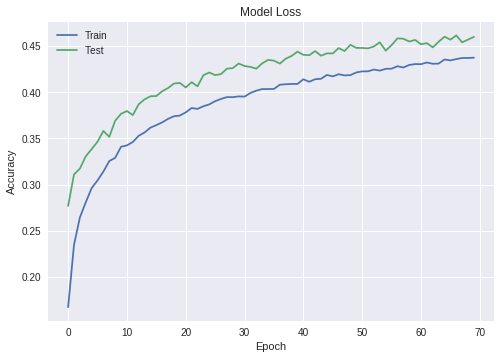

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Loss graphs


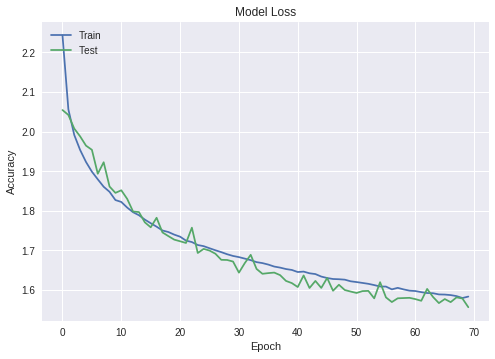

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Out of all the 9 models built, models 7 and 8 provided the best results. Further explaination of the networks and the analysis can be found in the report in the repository.